# Démonstration SVM en utilisant la base MNIST

## Importation des Bibliothèques:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

## Charger le dataset MNIST

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(int) # Conversion des données en float32 et des labels en entiers

## Normalisation des données

In [ ]:
X /= 255.0 # Normalisation des pixels pour être entre 0 et 1

# Réduire la dimension avec PCA

In [ ]:
# Réduction de dimensionnalité avec PCA (on garde 95% de la variance)
pca = PCA(n_components=50)  # Réduire à 50 dimensions (optimisé pour classification)
X_pca = pca.fit_transform(X)

# Séparer en données d'entraînement et de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

  # Entraîner un classifieur SVM

In [7]:
svm_model = SVC(kernel='rbf', C=10)  # RBF est souvent plus performant sur MNIST
svm_model.fit(X_train, y_train)

SVC(C=10)

# Prédictions et évaluation

In [8]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVM après PCA): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Test Accuracy (SVM après PCA): 98.54%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



# Visualisation en 2D si PCA réduit à 2 composants

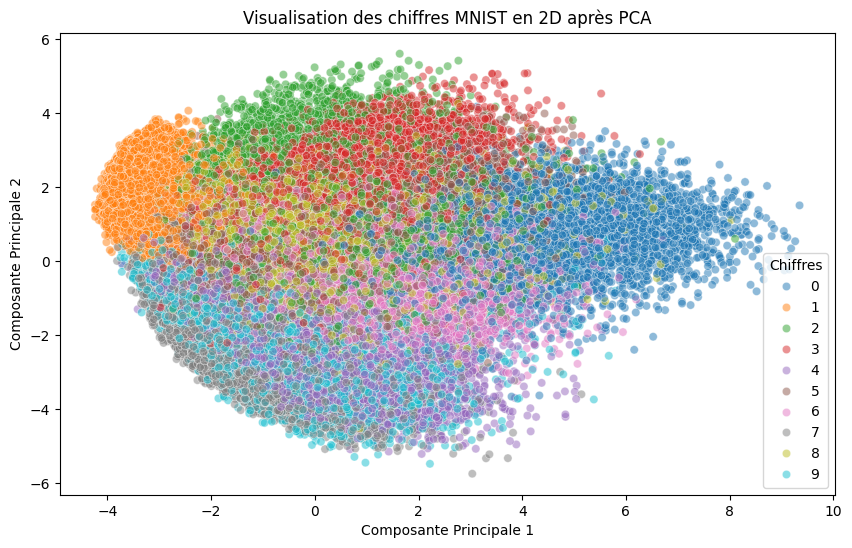

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()

## Analyse des résultats :

### Précision : 
La précision du modèle sur les données de test.

### Matrice de confusion : 
Visualisation des performances du modèle en termes de classification correcte et incorrecte.